# Cross-Validation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score
from sklearn.utils import resample

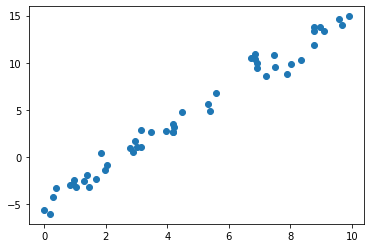

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
X = x[:, np.newaxis]
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

0.9790800609430612


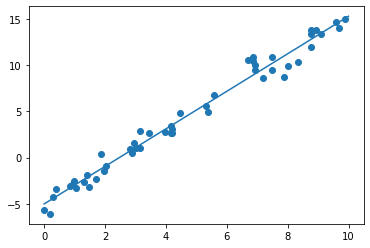

In [3]:
model = LinearRegression(fit_intercept=True)

model.fit(X, y)
print(model.score(X, y))

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
# give model, dataset, output var?, cv= # of folds)
# runs model in all 3 folds, predicts test set, compares, and just gives back # (correlation coeff) from each fold
print(cross_val_score(model, X, y, cv=3))

[0.96603722 0.99136218 0.96953465]


In [5]:
# cross_val_score takes y_pred and plugs into r2_score
y_pred = cross_val_predict(model, X, y, cv=3)
r2_score(y, y_pred)

0.9789525146667679

# More manual cross-validation

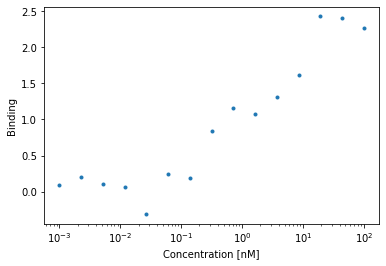

In [6]:
X = np.logspace(-3, 2, num=15)
Y = 1.0 * X / (1.0 + 0.4 * X) + 0.5 * rng.randn(*X.shape)

plt.semilogx(X, Y,'.');
plt.xlabel('Concentration [nM]')
plt.ylabel('Binding');

In [7]:
x0=np.ones(2)
def klotz1(xx, lig):
    """ A function defining our binding curve. """
    return (xx[1]*lig)/(1 + xx[0]*lig)

def ls_obj_k1(xx, ligs, data):
    """ A function that returns the residuals between our prediction and the data. """
    return(data - klotz1(xx,ligs))

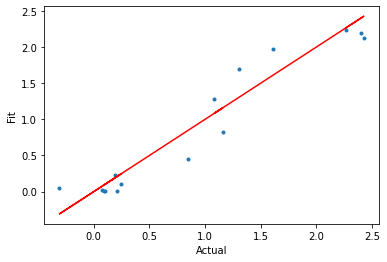

In [8]:
res = sp.optimize.least_squares(ls_obj_k1, x0, args=(X,Y))
assert res.success

plt.plot(Y, klotz1(res.x, X), '.')
plt.plot(Y, Y, 'r-')
plt.xlabel("Actual")
plt.ylabel("Fit");

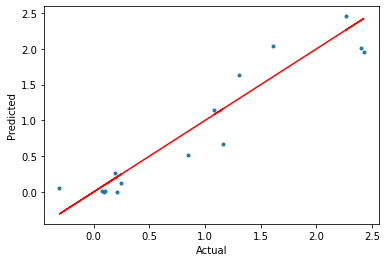

In [9]:
# creates folds
kf = KFold(n_splits=2, shuffle=True)
Y_pred = np.empty_like(Y)

for train_index, test_index in kf.split(X):
    # loops putting into folds
    res = sp.optimize.least_squares(ls_obj_k1, x0, args=(X[train_index], Y[train_index]))

    Y_pred[test_index] = klotz1(res.x, X[test_index])

plt.plot(Y, Y_pred, '.')
plt.plot(Y, Y, 'r-')
plt.xlabel("Actual")
plt.ylabel("Predicted");

# Bootstrap

In [13]:
p_boot = np.empty((2, 1000))
print(p_boot.shape)
for bootstrapi in range(p_boot.shape[1]):
    resamp = resample(range(X.shape[0]))

    res = sp.optimize.least_squares(ls_obj_k1, x0, args=(X[resamp], Y[resamp]))
    p_boot[:, bootstrapi] = res.x

(2, 1000)


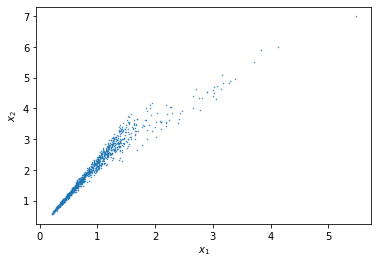

In [11]:
plt.scatter(p_boot[0, :], p_boot[1, :], s=0.2)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$");
# shows range of outcomes 
# each point is outcome of model fit to a resampled dataset. emax (max binding of fit) vs kd are highly correlated
